In [3]:
from aquistion_cam import *
%load_ext autoreload
%autoreload 2

## To install missing packages: install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install photutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load example files

In [32]:
path = "example_data/"
aquision_images, headers = opener(path)

In [40]:
opener?

## Generate a reduce aquistion camera image:

Deadpixel correction, this takes some time... and comsumes fuck all memory
The dead pixels are interpolated assuming the deadpixel mask stored in the module


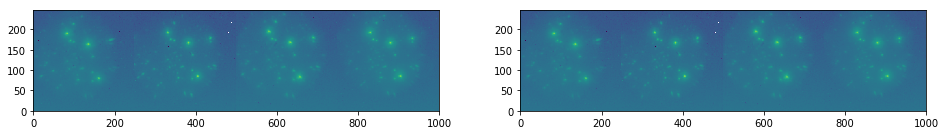

In [44]:
aqi = AquisitionImage(aquision_images[0], headers[0], verbose=True, test=True)

In [42]:
aqi?

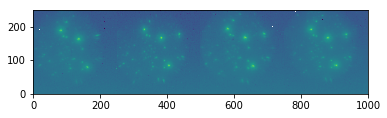

In [46]:
plt.imshow(np.nanmedian(aqi.image, axis=0), origin="lower", norm=LogNorm()) ## the telescope image still stacked. 

### Generate the science image object and the Galactic Center Image

In [33]:
si = ScienceImage(aquision_images[0], headers[0])

The science image creates a cropped out image centered on the science fiber. Basic dead pixel correction and standard reduction. No sky subtraction and darks atm. The indivdual dits are combined to frames of a choosen binning. Some plotting tools

In [47]:
si?

The shape is  (230, 100, 100) so its not stacked yet!


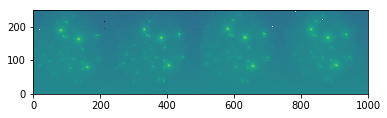

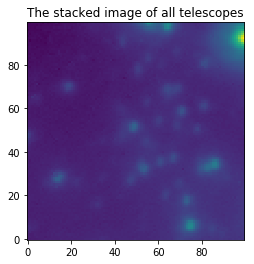

In [53]:
plt.imshow(np.nanmean(si.raw_image, axis=0), origin="lower", norm=LogNorm())
plt.figure()
plt.title("The stacked image of all telescopes")
plt.imshow(np.nanmean(si.image, axis=0), origin="lower", norm=LogNorm())
print("The shape is ", si.image.shape, "so its not stacked yet!")

### Lets stack the images to some binning!

In [34]:
si.stack=30 ## Set the number of dits per frame to forty, from default 20 (i.e. 28 seconds) 
si.get_frames()

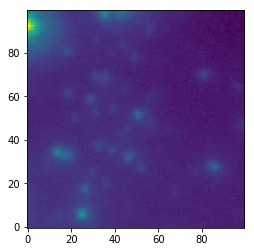

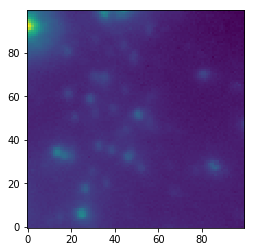

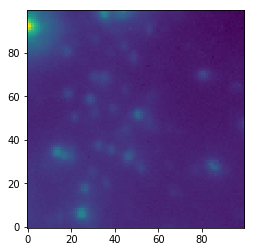

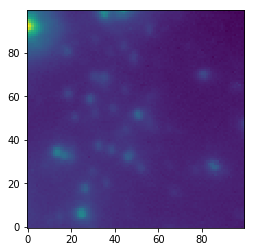

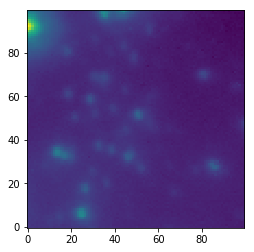

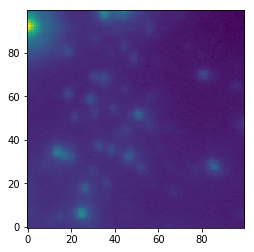

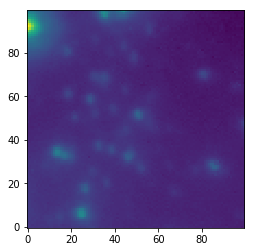

In [35]:
si.get_frame_plot() ## plot the frames 

### The Galactic Center Image Class

The Galactic Center Image class creates specific GC images, run a simple star finder, and at some point hopefully deconvolve. 

In [37]:
gci = GalacticCenterImage(aquision_images[0], headers[0])

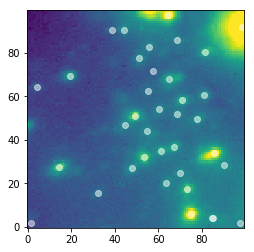

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,1.4697139125371907,1.5327179232342423,0.21555796667983226,-0.2142436446662719,0.06049748094514071,25,0.0,24.75,5.224817807084036,-1.7951778772650941
2,97.61578228944188,1.5701451347281568,0.22160595280334236,0.24695312409505357,0.11288471374785235,25,0.0,40.75,9.14477381691964,-2.4029324207097438
3,84.90737045092976,4.102050821347592,0.5502217646441826,-0.14164897273161914,-0.2846776981501124,25,0.0,45.0,1.192987814872555,-0.19159001956848595
4,84.62570146290159,4.16177042842415,0.4799992491740652,0.03596032301229739,-0.6002954008971726,25,0.0,44.5,1.0060032894424757,-0.006498501959761904
5,74.87157330353587,5.820931528609325,0.37834607420189265,0.92452658065373,0.37308919484216235,25,0.0,145.75,20.405704746578802,-3.2743789962129406
6,32.32285509591567,15.305103662263868,0.4160416456062091,0.28518810507603354,-0.4644703325304966,25,0.0,34.5,1.623664630910282,-0.5262408258312768
7,73.24190772097681,17.228622394770934,0.4072187399397807,0.535525502357334,0.09020260713603553,25,0.0,70.0,6.68845644870722,-2.0633147588609404
8,63.529164839409006,20.195725213094526,0.42325365505638174,0.8059611587993835,0.7420481389355792,25,0.0,41.5,1.8448386075814425,-0.6648959466948241
9,70.04514198939727,24.913451789395285,0.37862068413852984,0.05182807043856129,-0.14060432292696384,25,0.0,42.25,1.8761679140180263,-0.6831792611045082


In [15]:
gci.get_stars()
gci.sources

## Reduce a whole night, and save images as a aligend cube!

In [56]:
from aquistion_cam import *
path = "example_data/"
observation_night  =  ObservationNight(path)
observation_night.get_reduction()
observation_night.save(overwrite=True)

In [ ]:
ll example_data